# CSC 578 Class Project
# Shreyas Puttaraju
# 2061470


In [2]:
# Tf
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/csc-578-final-project-fall-2022/Metro_Interstate_reduced.csv


In [3]:
#Tf and My Code
import os
import datetime
import csv
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras.layers import BatchNormalization

import warnings
warnings.filterwarnings("ignore")

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [4]:
#Tf
# Importing Data
csv_path = tf.keras.utils.get_file(
    origin='https://reed.cs.depaul.edu/peterh/Essays/Metro_Interstate_reduced.csv',
    fname='Metro_Interstate_reduced.csv',
    cache_dir='/content', cache_subdir='sample_data')

2719744/2703553 [==============================] - 0s 0us/step


In [5]:
#Tf 
# Creating a data frame
df = pd.read_csv(csv_path)
#Seperating Date_Time Column
date_time = pd.to_datetime(df.pop('date_time'), format='%Y.%m.%d %H:%M:%S')
#Printing First Five Cols
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [11]:
#MY Code
# Looking into date and time
date_time

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
40570   2018-09-30 19:00:00
40571   2018-09-30 20:00:00
40572   2018-09-30 21:00:00
40573   2018-09-30 22:00:00
40574   2018-09-30 23:00:00
Name: date_time, Length: 40575, dtype: datetime64[ns]

In [13]:
#My Code
#Extracting only hour as a new variable 
df['hour'] = date_time.dt.hour

In [14]:
#Tf
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [21]:
#Tf
day = 24*60*60
#hour = 60*60
year = (365.2425)*day

#df['Hr sin'] = np.sin(timestamp_s * (2 * np.pi / hour))
#df['Hr cos'] = np.cos(timestamp_s * (2 * np.pi / hour))
df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [15]:
#My Code
#Looking into weather main variable
df['weather_main'].value_counts()

Clouds          15123
Clear           13366
Rain             4769
Mist             3069
Snow             2297
Haze              766
Drizzle           515
Thunderstorm      453
Fog               201
Smoke              15
Squall              1
Name: weather_main, dtype: int64

In [16]:
#My Code
# Manually Grouping Holiday varialble
# 0 if it is not an holiday, 1 if any other holiday
df['holiday'].replace({"None":"0","Columbus Day":"1","Veterans Day":"1","Thanksgiving Day":"1","Christmas Day":"1","New Years Day":"1","Washingtons Birthday":"1","Memorial Day":"1","Independence Day":"1","State Fair":"1","Labor Day":"1","Martin Luther King Jr Day":"1"},inplace=True)
df['holiday'] = df['holiday'].astype(int)
print(df['holiday'].value_counts())

0    40522
1       53
Name: holiday, dtype: int64


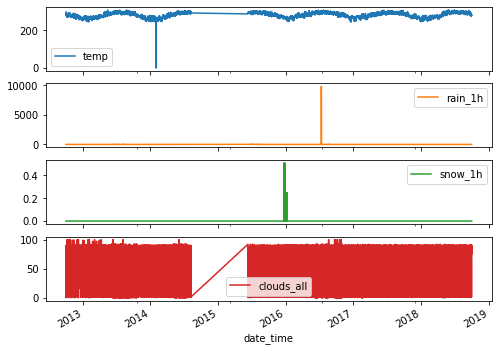

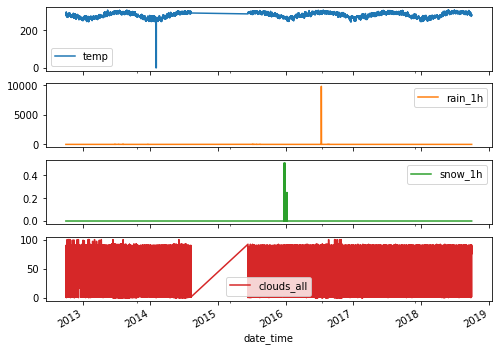

In [99]:
#Tf
plot_cols = ['temp', 'rain_1h','snow_1h','clouds_all']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:40574]
plot_features.index = date_time[:40574]
_ = plot_features.plot(subplots=True)

In [17]:
#My Code
# Handling few outliers 
# Filling rain with the next hour data 
# Replacing temp outlier with mean 
df["rain_1h"] = np.where(df["rain_1h"] >60,df["rain_1h"].shift(),df['rain_1h'])
df["temp"] = np.where(df["temp"] <240,df["temp"].mean(),df['temp'])

In [18]:
#My Code
#Looking for insights
df.describe()

,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour
count,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000
mean,0.001306,281.386096,0.076332,0.000117,44.199162,3290.650474,11.514750
std,0.036119,13.091572,0.769626,0.005676,38.683447,1984.772909,6.949889
min,0.000000,243.390000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,271.850000,0.000000,0.000000,1.000000,1248.500000,5.000000
50%,0.000000,282.860000,0.000000,0.000000,40.000000,3427.000000,12.000000
75%,0.000000,292.280000,0.000000,0.000000,90.000000,4952.000000,18.000000
max,1.000000,310.070000,55.630000,0.510000,100.000000,7280.000000,23.000000


In [19]:
#My Code
# Dropping Weather Discription since it has too much collieanrity with weather main
df = df.drop(columns = ['weather_description'],axis =1)

In [ ]:
#My Code
# One hot encoding holiday and weather main
df = pd.get_dummies(df, columns = ['holiday','weather_main'])

In [23]:
#Looking at the data before normalizing
df.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,holiday_0,holiday_1,weather_main_Clear,weather_main_Clouds,...,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,Day sin,Day cos,Year sin,Year cos
0,288.28,0.0,0.0,40,5545,9,1,0,0,1,...,0,0,0,0,0,0,7.071068e-01,-0.707107,-0.999766,0.021642
1,289.36,0.0,0.0,75,4516,10,1,0,0,1,...,0,0,0,0,0,0,5.000000e-01,-0.866025,-0.999750,0.022358
2,289.58,0.0,0.0,90,4767,11,1,0,0,1,...,0,0,0,0,0,0,2.588190e-01,-0.965926,-0.999734,0.023075
3,290.13,0.0,0.0,90,5026,12,1,0,0,1,...,0,0,0,0,0,0,1.143105e-11,-1.000000,-0.999717,0.023791
4,291.14,0.0,0.0,75,4918,13,1,0,0,1,...,0,0,0,0,0,0,-2.588190e-01,-0.965926,-0.999700,0.024508


In [24]:
#My Code
#Normalizing numeric variables of the data with minmax scaler
from sklearn.preprocessing import MinMaxScaler
#seperate target label and normalize seperately,helps with de-normalize only target at the end before getting CSV
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()
features_to_norm = ['temp','clouds_all','rain_1h','snow_1h','Day sin','Day cos','Year cos','Year sin','hour']
target_to_norm = ['traffic_volume']
df[features_to_norm] = feature_scaler.fit_transform(df[features_to_norm])
df[target_to_norm] = target_scaler.fit_transform(df[target_to_norm])
df.head()


,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,holiday_0,holiday_1,weather_main_Clear,weather_main_Clouds,...,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,Day sin,Day cos,Year sin,Year cos
0,0.673215,0.0,0.0,0.40,0.761676,0.391304,1,0,0,1,...,0,0,0,0,0,0,0.853553,0.146447,0.000117,0.510821
1,0.689412,0.0,0.0,0.75,0.620330,0.434783,1,0,0,1,...,0,0,0,0,0,0,0.750000,0.066987,0.000125,0.511179
2,0.692711,0.0,0.0,0.90,0.654808,0.478261,1,0,0,1,...,0,0,0,0,0,0,0.629410,0.017037,0.000133,0.511537
3,0.700960,0.0,0.0,0.90,0.690385,0.521739,1,0,0,1,...,0,0,0,0,0,0,0.500000,0.000000,0.000142,0.511896
4,0.716107,0.0,0.0,0.75,0.675549,0.565217,1,0,0,1,...,0,0,0,0,0,0,0.370590,0.017037,0.000150,0.512254


In [25]:
#My Code
#Checking the data types to be sure before model building
df.dtypes

temp                         float64
rain_1h                      float64
snow_1h                      float64
clouds_all                   float64
traffic_volume               float64
hour                         float64
holiday_0                      uint8
holiday_1                      uint8
weather_main_Clear             uint8
weather_main_Clouds            uint8
weather_main_Drizzle           uint8
weather_main_Fog               uint8
weather_main_Haze              uint8
weather_main_Mist              uint8
weather_main_Rain              uint8
weather_main_Smoke             uint8
weather_main_Snow              uint8
weather_main_Squall            uint8
weather_main_Thunderstorm      uint8
Day sin                      float64
Day cos                      float64
Year sin                     float64
Year cos                     float64
dtype: object

In [26]:
#My Code
# Splitting the data

train_df = df[0:30574]
val_df = df[30575:35574]
test_df = df[35575:]



In [27]:
#Tf
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [28]:
#tf
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [29]:
# Tf
# generating the window
window = WindowGenerator(
    input_width=12, label_width=1, shift=3,
    label_columns=['traffic_volume'])

window

Total window size: 15
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [14]
Label column name(s): ['traffic_volume']

In [30]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:window.total_window_size]),
                           np.array(train_df[100:100+window.total_window_size]),
                           np.array(train_df[200:200+window.total_window_size])])

example_inputs, example_labels = window.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

2022-11-22 03:01:04.341280: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


All shapes are: (batch, time, features)
Window shape: (3, 15, 23)
Inputs shape: (3, 12, 23)
Labels shape: (3, 1, 1)


2022-11-22 03:01:04.447285: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 03:01:04.448305: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 03:01:04.451783: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-22 03:01:04.452114: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [31]:
#TF
window.example = example_inputs, example_labels

In [32]:
#Tf
def plot(self, model=None, plot_col='traffic_volume', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

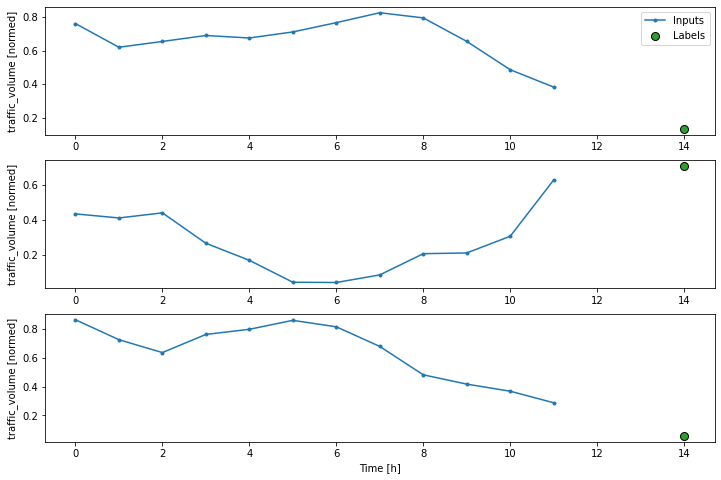

In [33]:
#Tf
window.plot()

In [91]:
# Tf
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=False,
      batch_size=128,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [35]:
#Tf
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [71]:
#Tf
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=10):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                     callbacks = [early_stopping])
                      
  return history


# Baseline Model

In [38]:
#Baseline Model
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(128, return_sequences=False),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1),
    tf.keras.layers.Reshape([1, -1]),
])

In [39]:
# PRinting Input and Output Shape
print('Input shape:', window.example[0].shape)
print('Output shape:', lstm_model(window.example[0]).shape)

2022-11-22 03:02:18.814677: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Input shape: (64, 12, 23)


2022-11-22 03:02:19.920488: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


Output shape: (64, 1, 1)


In [121]:
#Model Summary
lstm_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (32, 128)                 73216     
_________________________________________________________________
dense_17 (Dense)             (32, 1)                   129       
_________________________________________________________________
reshape_5 (Reshape)          (32, 1, 1)                0         
Total params: 73,345
Trainable params: 73,345
Non-trainable params: 0
_________________________________________________________________


In [40]:
#Dict to store 
val_performance ={}
performance = {}

In [41]:
#Tf 
history = compile_and_fit(lstm_model, window)
val_performance["LSTM"] = lstm_model.evaluate(window.val)
performance["LSTM"] = lstm_model.evaluate(window.test, verbose=0)

Epoch 1/20
478/478 [==============================] - 7s 11ms/step - loss: 0.0322 - mean_absolute_error: 0.1356 - val_loss: 0.0299 - val_mean_absolute_error: 0.1356
Epoch 2/20
478/478 [==============================] - 4s 9ms/step - loss: 0.0258 - mean_absolute_error: 0.1182 - val_loss: 0.0492 - val_mean_absolute_error: 0.1834
Epoch 3/20
478/478 [==============================] - 4s 9ms/step - loss: 0.0244 - mean_absolute_error: 0.1136 - val_loss: 0.0633 - val_mean_absolute_error: 0.2057
Epoch 4/20
478/478 [==============================] - 4s 9ms/step - loss: 0.0228 - mean_absolute_error: 0.1076 - val_loss: 0.0459 - val_mean_absolute_error: 0.1736
Epoch 5/20
478/478 [==============================] - 4s 9ms/step - loss: 0.0221 - mean_absolute_error: 0.1054 - val_loss: 0.0634 - val_mean_absolute_error: 0.1974
Epoch 6/20
478/478 [==============================] - 4s 9ms/step - loss: 0.0215 - mean_absolute_error: 0.1035 - val_loss: 0.0550 - val_mean_absolute_error: 0.1969
Epoch 7/20
478/

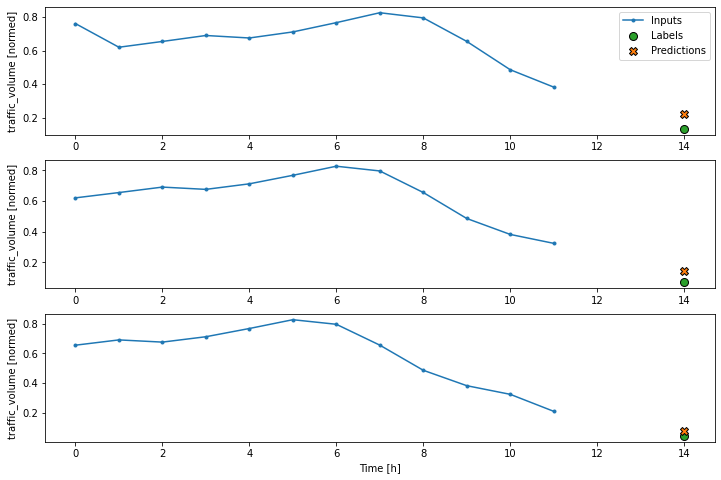

In [42]:
window.plot(lstm_model)

In [44]:
#Stacking LSTM Layers to create an improved model than baseline model
lstm_model1 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(128, return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1),
    tf.keras.layers.Reshape([1, -1]),
])

In [45]:
print('Input shape:', window.example[0].shape)
print('Output shape:', lstm_model1(window.example[0]).shape)

Input shape: (64, 12, 23)
Output shape: (64, 1, 1)


In [126]:
lstm_model1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (32, 12, 128)             73216     
_________________________________________________________________
dropout_11 (Dropout)         (32, 12, 128)             0         
_________________________________________________________________
lstm_18 (LSTM)               (32, 128)                 131584    
_________________________________________________________________
dropout_12 (Dropout)         (32, 128)                 0         
_________________________________________________________________
dense_18 (Dense)             (32, 1)                   129       
_________________________________________________________________
reshape_6 (Reshape)          (32, 1, 1)                0         
Total params: 204,929
Trainable params: 204,929
Non-trainable params: 0
________________________________________________

In [46]:
history = compile_and_fit(lstm_model1, window)

IPython.display.clear_output()
val_performance["LSTMwD"] = lstm_model1.evaluate(window.val)
performance["LSTMwD"] = lstm_model1.evaluate(window.test, verbose=0)

78/78 [==============================] - 1s 8ms/step - loss: 0.0090 - mean_absolute_error: 0.0650


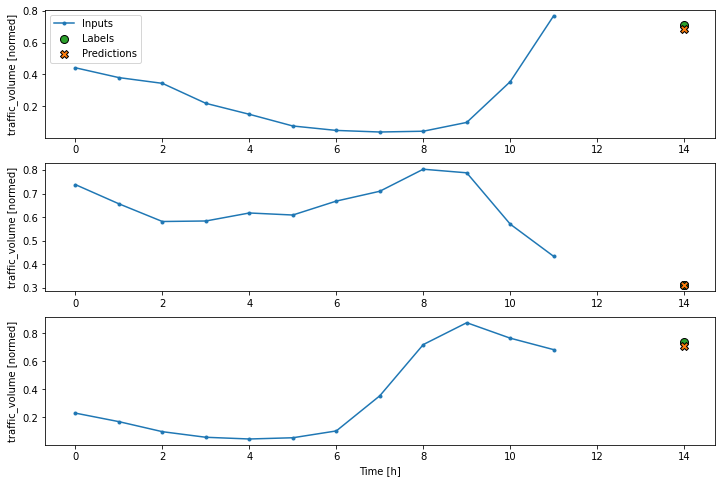

In [128]:
window.plot(lstm_model1)

# BEST MODEL
# Bi Directional LSTM Model

In [98]:
bi_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512, return_sequences=True, stateful = False)),
    tf.keras.layers.LSTM(256, return_sequences=True),
    tf.keras.layers.Dropout(0.1),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LSTM(128, return_sequences=False),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units=128, activation='relu'),
    #tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=1),
    tf.keras.layers.Reshape([1, -1]),
])

In [99]:
history = compile_and_fit(bi_lstm_model, window)
IPython.display.clear_output()
val_performance["BI_LSTM"] = bi_lstm_model.evaluate(window.val)
performance["BI_LSTM"] = bi_lstm_model.evaluate(window.test, verbose=0)

39/39 [==============================] - 1s 21ms/step - loss: 0.0066 - mean_absolute_error: 0.0520


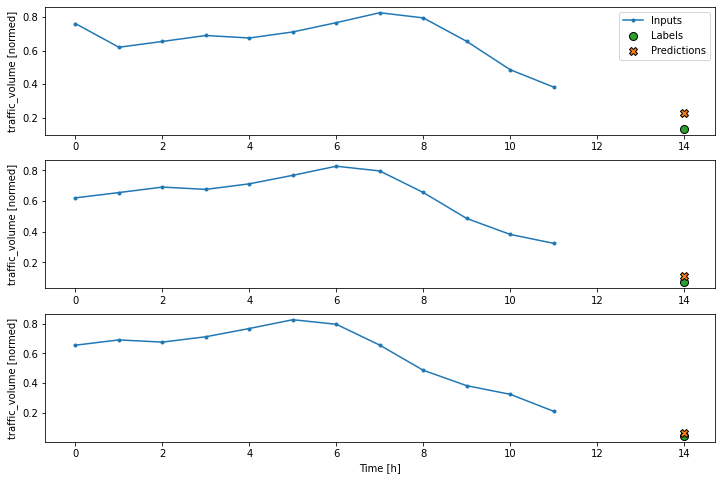

In [97]:
window.plot(bi_lstm_model)

In [79]:
# 1D - Conv Model with LSTM 
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters= 128,
                           kernel_size=(12,),
                           activation='relu'),
    tf.keras.layers.LSTM(512, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(512, return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [80]:
history = compile_and_fit(conv_model, window)

IPython.display.clear_output()
val_performance["conv_model"] = conv_model.evaluate(window.val)
performance["conv_model"] = conv_model.evaluate(window.test, verbose=0)

78/78 [==============================] - 1s 8ms/step - loss: 0.0084 - mean_absolute_error: 0.0627


# Second Best Model

In [81]:
#1D Conv Model with Bi-LSTM
cnn_rnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=128,
                           kernel_size=(12,),
                           activation='relu'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512, return_sequences=True, stateful = False)),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.LSTM(128, return_sequences=False),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [82]:
history = compile_and_fit(cnn_rnn_model, window)
IPython.display.clear_output()
val_performance["cnn_rnn"] = cnn_rnn_model.evaluate(window.val)
performance["cnn_rnn"] = cnn_rnn_model.evaluate(window.test, verbose=0)

78/78 [==============================] - 1s 13ms/step - loss: 0.0088 - mean_absolute_error: 0.0611


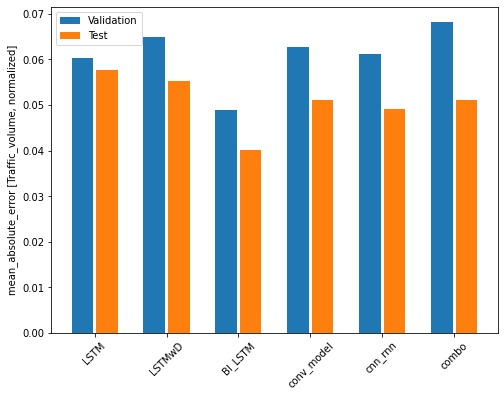

In [85]:
#Tf
#Plot the performance of models
x = np.arange(len(performance))
width = 0.3
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [Traffic_volume, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [100]:
# My Code
# Predicting with the best model
prediction= bi_lstm_model.predict(window.test)
preds = list(np.concatenate(prediction))
index = list(test_df.index)
# Deleting 14 first index since they dont have any prediction values (input and shift)
del index[:14]
out = {'id':index,'prediction':preds}
#Creating a new df to store the predicting values
output = pd.DataFrame(out)
cols_to_denorm = ['prediction']
#Denormalizing the predicted values 
output[cols_to_denorm] = target_scaler.inverse_transform(output[cols_to_denorm])
output


,id,prediction
0,35589,4672.667961
1,35590,4875.479112
2,35591,5490.902610
3,35592,5693.521099
4,35593,4840.499372
...,...,...
4981,40570,3349.595222
4982,40571,2911.554189
4983,40572,2472.676554
4984,40573,1698.495817


In [101]:
#Export into CSV
output.to_csv('submission.csv', index=False)